In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.pool import QueuePool
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option("display.max_columns", 100)

In [2]:
db_uri = ""
engine = create_engine(db_uri, poolclass=QueuePool, pool_size=10, max_overflow=20)

In [3]:
query = f"""
select *
from backtesting_output
"""

In [4]:
with engine.connect() as connection:
    df = pd.read_sql(query, connection)

In [5]:
#df.to_csv("../data/backtesting_output_old_version.csv")

In [6]:
df.shape

(8241, 37)

In [7]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(8241, 37)
(8241, 37)


In [8]:
# companies we invested in less than 3 years ago and no return has been realized should not count
# because we do not have all the period to assess
print(df.shape)
newest_possible_date = (datetime.today() -pd.DateOffset(days=3*365))
df = df[~((df["min_price_date"] > newest_possible_date) & (pd.isna(df["doubling_return_delay"])))]
print(df.shape)

(8241, 37)
(6451, 37)


In [9]:
df.head()

,ticker,ref_report_date,report_date,ref_report_date_quarter,report_date_quarter,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif,ticker_type
1,0005.HK,2000-12-31,2009-12-31,Q4,Q4,NaN,1.181280e+10,1.350479e+10,1.279266e+10,1.282151e+10,1.236182e+10,1.245737e+10,1.071793e+10,1.048480e+10,1.047627e+10,-19.11,5.60,2010-05-27,68.950,2011-02-18,91.900,NaN,NaN,NaN,NaN,0.73,137.900,NaT,NaN,33.28,82.7400,73.5200,NaN,NaN,82.7400,-16.05,listed
2,000609.SZ,2009-09-30,2018-09-30,Q3,Q3,38092226.0,1.112062e+08,2.697761e+08,2.981654e+08,2.979624e+08,2.984793e+08,2.993418e+08,2.982023e+08,2.974527e+08,2.971966e+08,139.90,458.15,2018-10-19,3.940,2020-05-20,8.380,4.956838,1.719287,20.51,-129.16,1.59,7.880,2020-05-07,1.55,112.69,4.7280,6.7040,4.62,-175.0,4.7280,60.18,listed
3,0006.HK,2011-06-30,2020-06-30,Q2,Q2,NaN,2.134262e+09,2.134262e+09,2.134262e+09,2.134262e+09,2.134262e+09,2.134262e+09,2.134262e+09,2.134262e+09,2.134262e+09,0.00,0.00,2020-11-03,39.200,2022-05-17,54.900,NaN,NaN,NaN,NaN,1.53,78.400,NaT,NaN,40.05,47.0400,43.9200,NaN,NaN,47.0400,-9.55,listed
4,0007.HK,2011-06-30,2020-06-30,Q2,Q2,NaN,4.123807e+09,3.894106e+09,2.521280e+09,1.749158e+09,1.621958e+09,1.518628e+09,1.458914e+09,7.555860e+08,6.368440e+08,-91.55,-58.64,2020-11-03,0.160,2020-11-03,0.494,NaN,NaN,NaN,NaN,0.00,0.320,2022-04-19,1.46,208.75,0.1920,0.3952,NaN,NaN,0.1920,152.40,listed
6,0009.HK,2011-06-30,2020-06-30,Q2,Q2,NaN,3.568791e+09,3.267541e+09,2.698645e+09,2.261158e+09,1.520003e+09,1.334644e+09,9.592910e+08,5.889070e+08,3.442499e+08,-95.78,-37.20,2020-07-08,0.051,2021-04-22,0.102,NaN,NaN,NaN,NaN,0.79,0.102,NaT,NaN,100.00,0.0612,0.0816,NaN,NaN,0.0612,48.00,listed


In [10]:
df.describe()

/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ref_report_date,report_date,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif
count,6451,6451,3.301000e+03,6.107000e+03,6.136000e+03,6.005000e+03,5.830000e+03,5.684000e+03,5.564000e+03,5.430000e+03,5.258000e+03,4.888000e+03,5.893000e+03,5.874000e+03,6451,6.451000e+03,6451,6.451000e+03,3.300000e+03,3.300000e+03,3300.000000,3300.000000,6451.000000,6.451000e+03,4307,4307.000000,6451.000,6.451000e+03,6.451000e+03,3300.000000,3300.000000,6.451000e+03,6451.000
mean,2009-07-11 13:37:12.770113280,2018-01-03 07:26:53.331266304,1.704650e+09,1.330588e+10,1.053795e+10,2.807601e+09,1.215933e+09,1.085609e+09,1.060728e+09,1.341227e+09,3.006727e+09,1.099729e+09,1.489701e+04,-1.241736e+15,2018-03-11 20:25:42.458533632,7.409396e+04,2019-05-07 16:16:08.780034048,4.288499e+05,1.242510e+04,4.955565e+03,51.419209,227.219767,1.155718,1.481879e+05,2019-09-17 13:03:01.379150336,1.156146,inf,8.891275e+04,3.430799e+05,41.703091,252.663706,8.891275e+04,inf
min,1985-12-31 00:00:00,1994-12-31 00:00:00,-1.900000e+07,-3.558100e+05,0.000000e+00,-1.000000e+06,-7.200000e-01,0.000000e+00,-4.493750e+05,-2.334190e+05,-3.000000e+04,0.000000e+00,-1.009879e+05,-7.293956e+18,1995-01-11 00:00:00,0.000000e+00,1996-12-05 00:00:00,2.000000e-03,1.072189e-04,-4.424287e+04,0.020000,-143800.910000,0.000000,0.000000e+00,1997-04-24 00:00:00,0.000000,0.000,0.000000e+00,1.600000e-03,-19.980000,-172581.090000,0.000000e+00,-48.000
25%,2007-05-31 00:00:00,2016-02-29 00:00:00,3.665935e+06,3.452542e+06,2.721896e+06,1.169807e+06,7.271050e+05,4.304545e+05,3.288398e+05,2.360290e+05,1.725535e+05,1.288270e+05,-9.111000e+01,-5.197500e+01,2016-04-08 00:00:00,2.200000e-01,2017-09-15 12:00:00,1.480000e+00,4.369368e-01,2.899328e-02,19.145000,4.242500,0.340000,4.400000e-01,2018-03-07 12:00:00,0.340000,72.885,2.640000e-01,1.184000e+00,2.980000,-14.910000,2.640000e-01,21.970
50%,2010-12-31 00:00:00,2019-12-31 00:00:00,1.598360e+07,2.780300e+07,2.463536e+07,1.761184e+07,1.526564e+07,1.321550e+07,1.228019e+07,1.097116e+07,1.004594e+07,9.361262e+06,-3.405000e+01,-8.245000e+00,2020-03-19 00:00:00,2.070000e+00,2021-04-19 00:00:00,9.000000e+00,2.664595e+00,6.787685e-01,47.835000,62.370000,0.910000,4.140000e+00,2021-10-12 00:00:00,0.910000,158.540,2.484000e+00,7.200000e+00,37.405000,54.845000,2.484000e+00,104.200
75%,2011-09-04 12:00:00,2020-06-30 00:00:00,5.915184e+07,2.229143e+08,2.282502e+08,1.784250e+08,1.596585e+08,1.477671e+08,1.394055e+08,1.335724e+08,1.256792e+08,1.241330e+08,-8.300000e-01,0.000000e+00,2020-11-30 00:00:00,1.412000e+01,2022-07-07 12:00:00,3.954000e+01,1.166497e+01,4.517015e+00,88.142500,100.000000,1.890000,2.824000e+01,2023-03-20 12:00:00,1.900000,483.810,1.694400e+01,3.163200e+01,85.775000,100.000000,1.694400e+01,416.455
max,2022-09-19 00:00:00,2023-09-22 00:00:00,2.115663e+12,6.918545e+13,2.240734e+13,9.728026e+12,5.392900e+11,4.409577e+11,3.776884e+11,1.458402e+12,1.030035e+13,1.469110e+12,8.796505e+07,9.875463e+04,2023-11-15 00:00:00,4.588132e+08,2024-01-03 00:00:00,2.000000e+09,1.322512e+07,1.155538e+07,100.000000,290813.050000,3.000000,9.176263e+08,2024-01-03 00:00:00,3.000000,inf,5.505758e+08,1.600000e+09,100.000000,348955.660000,5.505758e+08,inf
std,NaN,NaN,4.045475e+10,8.863122e+11,4.078673e+11,1.261929e+11,1.491632e+10,1.315075e+10,1.292257e+10,2.364052e+10,1.437589e+11,2.290869e+10,1.145889e+06,9.516915e+16,NaN,5.713754e+06,NaN,2.655910e+07,2.844883e+05,2.043538e+05,34.739184,8078.122039,0.927775,1.142751e+07,NaN,0.924471,NaN,6.856505e+06,2.124728e+07,41.687074,9693.746357,6.856505e+06,NaN


### Get rid of lines having a noisy ncav and liqv

In [11]:
print(df.shape)
df = df[(df["ncavps"] != -np.Inf) & (~pd.isna(df["ncavps"])) & (df["liqvps"] != -np.Inf) & (~pd.isna(df["liqvps"]))]
print(df.shape)

(6451, 37)
(3300, 37)


What are the things that I want to see on the potential companies that we considered?
- stats on highest return modif
- How many companies we chose to invest in more than once
- stats on 10y slope and 5y slope
- with how many companies we lost money
- how much we lost in average with the losing companies
- mos of winning and losing companies
- how many lines give 100% return vs how many do not
- how long does it take in average to double bag
- how long does it take to make the highest return modif on the winning ones

### Stats on the highest return (modif)

In [12]:
df["highest_return_modif"].describe()

/Users/simonpalma/Documents/Axio/virt_envs/value_investment/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    3300.00
mean         inf
std          NaN
min       -48.00
25%        65.98
50%       221.45
75%      1057.55
max          inf
Name: highest_return_modif, dtype: float64

In [13]:
df.loc[df["highest_return_modif"] == np.Inf]

,ticker,ref_report_date,report_date,ref_report_date_quarter,report_date_quarter,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif,ticker_type
66,011210.KS,2013-12-31,2022-12-31,Q4,Q4,2.656232e+07,2.656164e+07,2.656173e+07,26561729.0,26561729.0,26561729.0,26561789.0,26561789.0,25730119.0,25730119.0,-2.71,0.00,2023-01-24,0.0,2023-07-06,70500.0000,12.958662,-21.640234,100.0,100.0,0.45,0.0,2023-01-25,0.00,inf,0.0,56400.00000,100.0,100.0,0.0,inf,listed
71,011500.KS,2013-12-31,2022-12-31,Q4,Q4,1.521606e+07,1.529402e+07,1.529402e+07,15294020.0,15294020.0,15294020.0,15294020.0,15294020.0,15294020.0,15294020.0,0.25,0.41,2023-01-24,0.0,2023-04-24,31850.0000,1.584976,3.339935,100.0,100.0,0.25,0.0,2023-02-27,0.09,inf,0.0,25480.00000,100.0,100.0,0.0,inf,listed
79,012750.KS,2013-12-31,2022-12-31,Q4,Q4,3.381121e+07,3.381121e+07,3.381024e+07,33810239.0,33810239.0,33810239.0,33810239.0,33810239.0,33810239.0,33796239.0,-0.02,0.00,2023-01-24,0.0,2023-12-14,63500.0000,8.906132,6.550835,100.0,100.0,0.89,0.0,2023-07-26,0.50,inf,0.0,50800.00000,100.0,100.0,0.0,inf,listed
169,030190.KQ,2013-12-31,2022-12-31,Q4,Q4,5.967123e+07,5.978279e+07,5.978279e+07,59782793.0,59782793.0,59480142.0,60705314.0,60750072.0,60729524.0,60594478.0,2.04,0.15,2023-02-20,0.0,2023-02-21,13820.0000,1.322194,-0.305514,100.0,100.0,0.00,0.0,2023-07-31,0.44,inf,0.0,11056.00000,100.0,100.0,0.0,inf,listed
441,085370.KQ,2013-12-31,2022-12-31,Q4,Q4,2.591993e+07,8.098457e+06,1.242377e+07,25232367.0,20719609.0,9200196.0,9820659.0,20501672.0,21868947.0,19230849.0,6.12,15.72,2023-02-20,0.0,2023-09-14,37950.0000,3.309016,1.922594,100.0,100.0,0.56,0.0,2023-03-14,0.06,inf,0.0,30360.00000,100.0,100.0,0.0,inf,listed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7752,VRSB.ME,2013-03-31,2022-03-31,Q1,Q1,7.486770e+07,7.486540e+07,7.486640e+07,74864529.0,74763329.0,56151024.0,56046651.0,56046651.0,56151024.0,56151024.0,-32.66,-0.11,2022-05-25,0.0,2023-02-15,304.4000,0.044643,0.000027,100.0,100.0,0.73,0.0,2022-10-10,0.38,inf,0.0,243.52000,100.0,100.0,0.0,inf,listed
7834,WEST3.SA,2020-09-30,2022-09-30,Q3,Q3,1.391058e+08,1.100118e+08,1.094768e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.05,-22.05,2022-11-15,0.0,2023-08-10,2.6700,0.297237,0.298172,100.0,100.0,0.73,0.0,2022-11-29,0.04,inf,0.0,2.13600,100.0,100.0,0.0,inf,listed
7849,WISE.L,2021-03-31,2023-03-31,Q4,Q4,1.052100e+09,1.037500e+09,1.013100e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.70,-3.70,2023-05-29,0.0,2023-12-28,890.0000,0.498771,-9.010775,100.0,100.0,0.58,0.0,2023-06-26,0.08,inf,0.0,712.00000,100.0,100.0,0.0,inf,listed
7861,WLBMF,1998-06-30,2007-06-30,Q2,Q2,7.586474e+07,5.076100e+07,4.467879e+07,35436365.0,29109241.0,25510941.0,25085941.0,13697180.0,10547180.0,10123180.0,-94.93,-63.15,2007-07-13,0.0,2007-07-13,0.6342,0.014379,0.102318,100.0,100.0,0.00,0.0,2008-12-19,1.44,inf,0.0,0.50736,100.0,100.0,0.0,inf,listed


### Get rid of the rows having highest_return_modif = np.Inf

In [14]:
print(df.shape)
df = df[df["highest_return_modif"] != np.Inf]
print(df.shape)

(3300, 37)
(3010, 37)


In [15]:
df["highest_return_modif"].describe()

count    3.010000e+03
mean     6.148932e+05
std      2.864262e+07
min     -4.800000e+01
25%      5.821500e+01
50%      1.760000e+02
75%      6.357800e+02
max      1.560000e+09
Name: highest_return_modif, dtype: float64

We still get very high returns

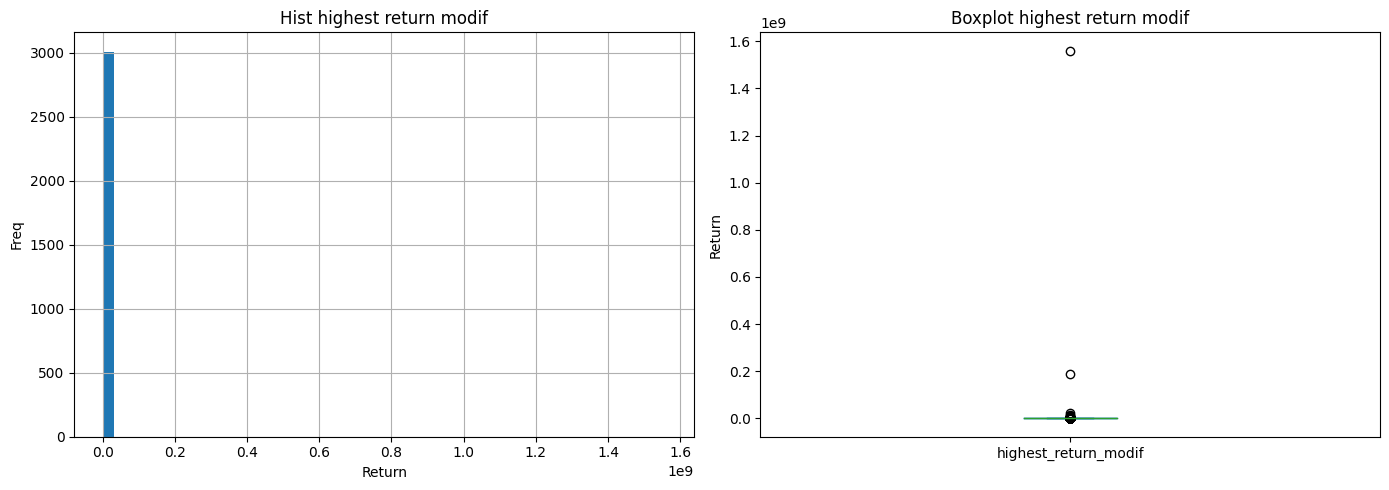

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df["highest_return_modif"].hist(bins=50, ax=ax[0])
df["highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist highest return modif")
ax[0].set_xlabel("Return")
ax[0].set_ylabel("Freq")
ax[1].set_title("Boxplot highest return modif")
ax[1].set_ylabel("Return");
plt.tight_layout()

In [17]:
df.sort_values(by="highest_return_modif", ascending=False).head(10)

,ticker,ref_report_date,report_date,ref_report_date_quarter,report_date_quarter,outs_shares1,outs_shares2,outs_shares3,outs_shares4,outs_shares5,outs_shares6,outs_shares7,outs_shares8,outs_shares9,outs_shares10,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y,min_price_date,min_price,max_price_date,max_price,ncavps,liqvps,ncav_mos,liqv_mos,highest_return_delay,doubling_price,doubling_date,doubling_return_delay,highest_return,min_price_modif,max_price_modif,ncav_mos_modif,liqv_mos_modif,doubling_price_modif,highest_return_modif,ticker_type
4171,GSFI.TA,2016-12-31,2022-12-31,Q4,Q4,15682680.0,15014000.0,15014000.0,15014000.0,15014000.0,15014000.0,15014000.0,NaN,NaN,NaN,-2.81,-3.47,2023-02-13,0.000100,2023-12-07,1625.000000,2.732569,-0.679444,100.00,100.01,0.81,0.000200,2023-03-16,0.08,1.625000e+09,0.000120,1300.000000,100.00,100.02,0.000120,1.560000e+09,listed
7034,SPMLF,2013-09-30,2022-09-30,Q3,Q3,8232327.0,9171732.0,11330632.0,13436911.0,14291566.0,15359131.0,15768565.0,18887320.0,21576866.0,23628790.0,190.40,81.76,2022-12-27,0.000001,2023-04-13,1.950000,1.371383,0.004176,100.00,99.98,0.29,0.000002,2023-03-23,0.24,1.949999e+08,0.000001,1.560000,100.00,99.97,0.000001,1.871999e+08,listed
6020,PACV,1994-03-31,1997-05-15,Q1,Q1,281.0,284.0,285.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN,-40.73,-40.73,2002-10-10,2.475248,2005-06-02,621782.178218,434875.444840,164697.508897,100.00,100.00,2.65,4.950495,2003-12-09,1.16,2.511990e+07,2.970297,497425.742574,100.00,100.00,2.970297,2.411506e+07,listed
2902,CNNC,2008-07-23,2011-08-22,Q2,Q2,20514.0,19300.0,18500.0,12550.0,NaN,NaN,NaN,NaN,NaN,NaN,-34.58,-34.58,2017-10-05,0.000400,2019-05-24,55.400002,8.567612,22.184374,100.00,100.00,1.63,0.000800,2017-11-24,0.14,1.384990e+07,0.000480,44.320002,99.99,100.00,0.000480,1.329586e+07,listed
3222,DFIFF,2010-03-31,2019-03-31,Q1,Q1,67895662.0,47344996.0,47344996.0,36025201.0,27643801.0,24977135.0,14488246.0,14481104.0,11878553.0,9384200.0,-95.32,-57.74,2019-06-10,0.000010,2021-03-22,1.003140,0.014011,0.013938,99.93,99.93,1.78,0.000020,2020-05-07,0.91,1.003130e+07,0.000012,0.802512,99.91,99.91,0.000012,9.630000e+06,listed
4929,KOAN,1998-08-12,2007-08-14,Q2,Q2,581.0,573.0,545.0,538.0,531.0,442.0,420.0,419.0,343.0,340.0,-43.71,-9.30,2012-04-16,0.002000,2014-09-16,200.000000,2108.433735,1412.323580,100.00,100.00,2.42,0.004000,2012-11-28,0.62,9.999900e+06,0.002400,160.000000,100.00,100.00,0.002400,9.599856e+06,listed
3639,EVTZF,2012-01-31,2021-01-31,Q3,Q3,76406389.0,76780796.0,76528720.0,76502893.0,75666776.0,74682278.0,75047300.0,74550102.0,73911680.0,73291263.0,-4.48,-0.92,2021-02-23,0.000200,2022-03-16,12.800000,1.946814,1.546556,99.99,99.99,1.06,0.000400,2023-04-10,2.13,6.399900e+06,0.000240,10.240000,99.99,99.98,0.000240,6.143856e+06,listed
5949,ORLA,2009-09-30,2018-09-30,Q3,Q3,179200000.0,128300000.0,31331946.0,17437924.0,5088549.0,4489000.0,3425000.0,2976521.0,1952661.0,1240000.0,-131.97,-111.91,2018-12-18,0.000100,2020-12-28,6.040000,0.063442,0.606219,99.84,99.98,2.03,0.000200,2019-01-24,0.10,6.039900e+06,0.000120,4.832000,99.81,99.98,0.000120,5.798256e+06,listed
8042,ORLA,2009-09-30,2018-09-30,Q3,Q3,179200000.0,128300000.0,31331946.0,17437924.0,5088549.0,4489000.0,3425000.0,2976521.0,1952661.0,1240000.0,-131.97,-111.91,2018-12-18,0.000100,2020-12-28,6.040000,0.063442,0.606219,99.84,99.98,2.03,0.000200,2019-01-24,0.10,6.039900e+06,0.000120,4.832000,99.81,99.98,0.000120,5.798256e+06,delisted
6830,SHE.AX,2011-06-30,2020-06-30,Q4,Q4,51288623.0,51288623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-137.14,-120.00,2020-07-17,0.004000,2021-12-28,102.880000,0.025105,0.042319,84.07,90.55,1.45,0.008000,2020-11-18,0.34,2.571900e+06,0.004800,82.304000,80.88,88.66,0.004800,2.468976e+06,listed


There are some high returns on stocks I couldn't find. Also the biggest returns on the ones I found is because a reverse split happened in the middle of the period

A more conservative estimation is achieved by omitting the outliers (the positive ones)

In [18]:
# Let's get rid of the outliers
q1 = np.quantile(df["highest_return_modif"], 0.25)
q3 = np.quantile(df["highest_return_modif"], 0.75)
iqr = q3 - q1
df_wo_outliers = df.copy()
df_wo_outliers = df_wo_outliers[(df_wo_outliers["highest_return_modif"] >= q1 - 1.5*iqr) & (df_wo_outliers["highest_return_modif"] <= q3 + 1.5*iqr)]

In [19]:
df_wo_outliers["highest_return_modif"].describe()

count    2583.000000
mean      256.326841
std       321.905635
min       -48.000000
25%        45.435000
50%       125.890000
75%       360.000000
max      1488.000000
Name: highest_return_modif, dtype: float64

* When getting rid of the outliers only the crazy positive returns are discarded (the losses are kept).
* We observe an average return of 160% with a max of 948% and a low of -48%.
* Note that the 50% of the samples have a return smaller than 84%
* There is a big std, which I would expect

### How many companies we invested on more than once

In [20]:
df_wo_outliers.loc[df_wo_outliers.duplicated(subset=["ticker"]), "ticker"].shape

(342,)

There are companies that appear as listed and delisted. We will get rid of the "listed" ones from this subset

In [21]:
print(df.shape)
df = df.drop_duplicates(subset=[col for col in df.columns if "ticker_type" not in col], keep="last")
print(df.shape)

(3010, 37)
(2850, 37)


In [22]:
df["highest_return_modif"].describe()

count    2.850000e+03
mean     6.470640e+05
std      2.943538e+07
min     -4.800000e+01
25%      5.964500e+01
50%      1.819250e+02
75%      6.705825e+02
max      1.560000e+09
Name: highest_return_modif, dtype: float64

In [23]:
# Let's get rid of the outliers
q1 = np.quantile(df["highest_return_modif"], 0.25)
q3 = np.quantile(df["highest_return_modif"], 0.75)
iqr = q3 - q1
df_wo_outliers = df.copy()
df_wo_outliers = df_wo_outliers[(df_wo_outliers["highest_return_modif"] >= q1 - 1.5*iqr) & (df_wo_outliers["highest_return_modif"] <= q3 + 1.5*iqr)]

In [24]:
df_wo_outliers["highest_return_modif"].describe()

count    2446.000000
mean      266.848647
std       336.569076
min       -48.000000
25%        48.020000
50%       131.155000
75%       368.940000
max      1584.000000
Name: highest_return_modif, dtype: float64

### stats on 10y slope and 5y slope

In [25]:
df_wo_outliers[["outs_shares_slope_pct_10y", "outs_shares_slope_pct_5y"]].describe()

,outs_shares_slope_pct_10y,outs_shares_slope_pct_5y
count,2.446000e+03,2446.000000
mean,3.598116e+04,105.450241
std,1.778615e+06,2592.799922
min,-1.134580e+04,-4250.350000
25%,-9.233250e+01,-60.332500
50%,-4.243500e+01,-14.790000
75%,-3.190000e+00,0.000000
max,8.796505e+07,79391.160000


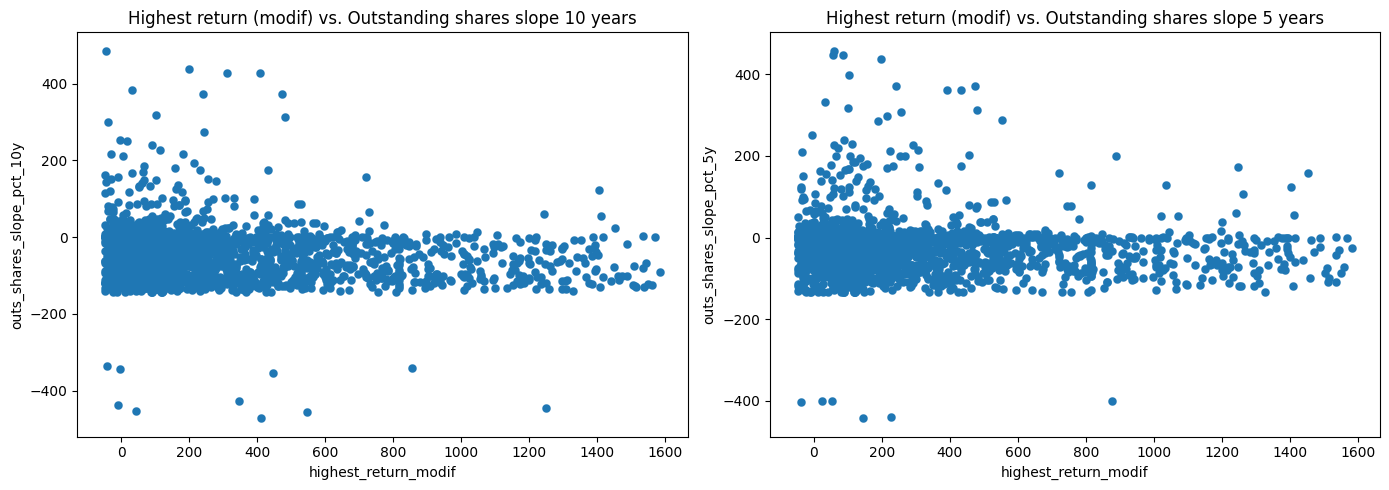

In [26]:
slope_thr = 500

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
condition_10y = (df_wo_outliers["outs_shares_slope_pct_10y"] > -slope_thr) & (df_wo_outliers["outs_shares_slope_pct_10y"] < slope_thr)
ax[0].scatter(df_wo_outliers.loc[condition_10y, "highest_return_modif"], df_wo_outliers.loc[condition_10y, "outs_shares_slope_pct_10y"], linewidths=0.1)
ax[0].set_xlabel("highest_return_modif")
ax[0].set_ylabel("outs_shares_slope_pct_10y")
ax[0].set_title("Highest return (modif) vs. Outstanding shares slope 10 years");

condition_5y = (df_wo_outliers["outs_shares_slope_pct_5y"] > -slope_thr) & (df_wo_outliers["outs_shares_slope_pct_5y"] < slope_thr)
ax[1].scatter(df_wo_outliers.loc[condition_5y, "highest_return_modif"], df_wo_outliers.loc[condition_5y, "outs_shares_slope_pct_5y"], linewidths=0.1)
ax[1].set_xlabel("highest_return_modif")
ax[1].set_ylabel("outs_shares_slope_pct_5y")
ax[1].set_title("Highest return (modif) vs. Outstanding shares slope 5 years");

plt.tight_layout()

In [27]:
df_wo_outliers.loc[df["highest_return_modif"] < 50, "outs_shares_slope_pct_10y"].describe(),  \
df_wo_outliers.loc[df["highest_return_modif"] >= 50, "outs_shares_slope_pct_10y"].describe()

(count      627.000000
 mean       -54.488549
 std        525.028466
 min     -11345.800000
 25%        -79.135000
 50%        -27.000000
 75%          0.000000
 max       3441.260000
 Name: outs_shares_slope_pct_10y, dtype: float64,
 count    1.819000e+03
 mean     4.840247e+04
 std      2.062499e+06
 min     -3.664910e+03
 25%     -9.541000e+01
 50%     -4.753000e+01
 75%     -5.545000e+00
 max      8.796505e+07
 Name: outs_shares_slope_pct_10y, dtype: float64)

* Counterintuitively the companies having a lower return have a more negative slope. It might be due to the negative outliers
* Note also that there are a lot of companies with a slope around 0 or negative but still low returns
* In general the greater the return the less the number of companies having a very positive slope. This can be more clearly observed for the 10 year slope

### Number of companies with which we lost money

In [28]:
nb_losing_money = df_wo_outliers[df_wo_outliers["highest_return_modif"] < 0].shape[0]
all_companies_wo_outliers = df_wo_outliers.shape[0]
losing_money_pct = round(100 * nb_losing_money / all_companies_wo_outliers, 2)
print(f"We lose money with {nb_losing_money} out of {all_companies_wo_outliers} companies. That is {losing_money_pct}% of the companies we put our money in")

We lose money with 322 out of 2446 companies. That is 13.16% of the companies we put our money in


### how much we lost in average with the losing companies

In [29]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "highest_return_modif"].describe()

count    322.000000
mean     -23.756149
std       13.833294
min      -48.000000
25%      -35.017500
50%      -23.165000
75%      -11.510000
max       -0.240000
Name: highest_return_modif, dtype: float64

Around 23.4%, with a max of 48% loss

### mos of winning and losing companies

In [30]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "ncav_mos"].describe(), df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 0 , "ncav_mos"].describe()

(count    322.000000
 mean      40.094689
 std       33.901556
 min        0.180000
 25%        9.265000
 50%       29.350000
 75%       69.430000
 max      100.000000
 Name: ncav_mos, dtype: float64,
 count    2124.000000
 mean       44.118658
 std        31.483797
 min         0.020000
 25%        16.240000
 50%        39.865000
 75%        68.610000
 max       100.000000
 Name: ncav_mos, dtype: float64)

In [31]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 0, "liqv_mos"].describe(), df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 0 , "liqv_mos"].describe()

(count       322.000000
 mean       2503.632112
 std       25409.140177
 min     -143800.910000
 25%          -9.062500
 50%          44.955000
 75%         107.385000
 max      290813.050000
 Name: liqv_mos, dtype: float64,
 count     2124.000000
 mean       -22.765499
 std       1382.060077
 min     -36457.310000
 25%         -5.987500
 50%         44.500000
 75%         93.687500
 max      18534.560000
 Name: liqv_mos, dtype: float64)

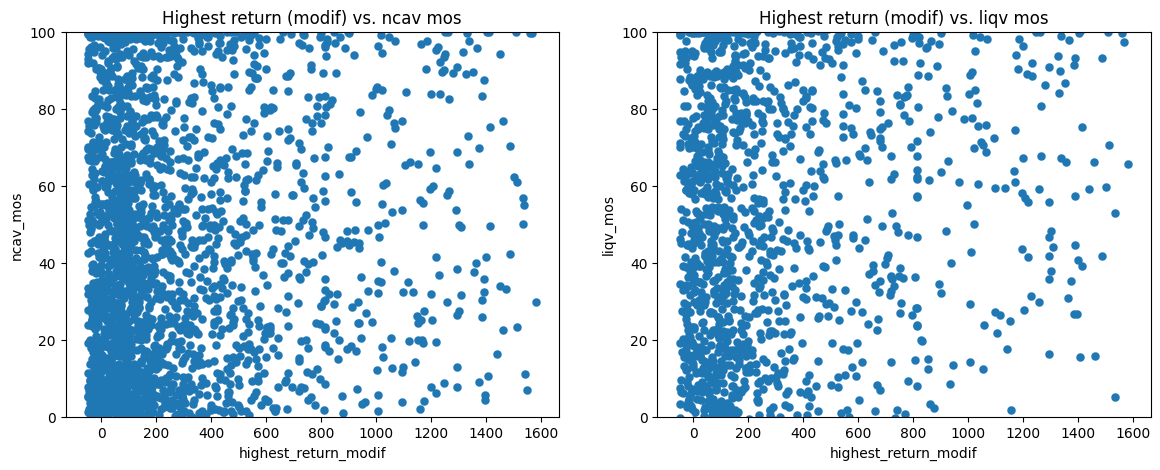

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(df_wo_outliers["highest_return_modif"], df_wo_outliers["ncav_mos"], linewidths=0.1)
ax[0].set_xlabel("highest_return_modif")
ax[0].set_ylabel("ncav_mos")
ax[0].set_title("Highest return (modif) vs. ncav mos");
ax[0].set_ylim(0, 100)

ax[1].scatter(df_wo_outliers["highest_return_modif"], df_wo_outliers["liqv_mos"], linewidths=0.1)
ax[1].set_xlabel("highest_return_modif")
ax[1].set_ylabel("liqv_mos")
ax[1].set_title("Highest return (modif) vs. liqv mos")
ax[1].set_ylim(0, 100);

- It does not seem like to mos of safety (ncav or liqv) are, by themselves, proxies of how good the return is going to be

### how many lines give 100% return vs how many do not

In [33]:
not100 = df_wo_outliers[df_wo_outliers["highest_return_modif"] < 100].shape[0]
print("Number of companies not giving 100% return: ", not100)
print(f"representing {round(100 * not100 / len(df_wo_outliers), 2)}")

Number of companies not giving 100% return:  1036
representing 42.35


In [34]:
yes100 = df_wo_outliers[df_wo_outliers["highest_return_modif"] >= 100].shape[0]
print("Number of companies giving 100% return: ", yes100)
print(f"representing {round(100 * yes100 / len(df_wo_outliers), 2)}")

Number of companies giving 100% return:  1410
representing 57.65


In [35]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 100, "highest_return_modif"].describe()

count    1036.000000
mean       28.541853
std        42.967196
min       -48.000000
25%        -9.357500
50%        32.010000
75%        66.795000
max        99.950000
Name: highest_return_modif, dtype: float64

Observe that the avg of the companies that do not double your money is 23.5, with more than 50% giving less than 22%.

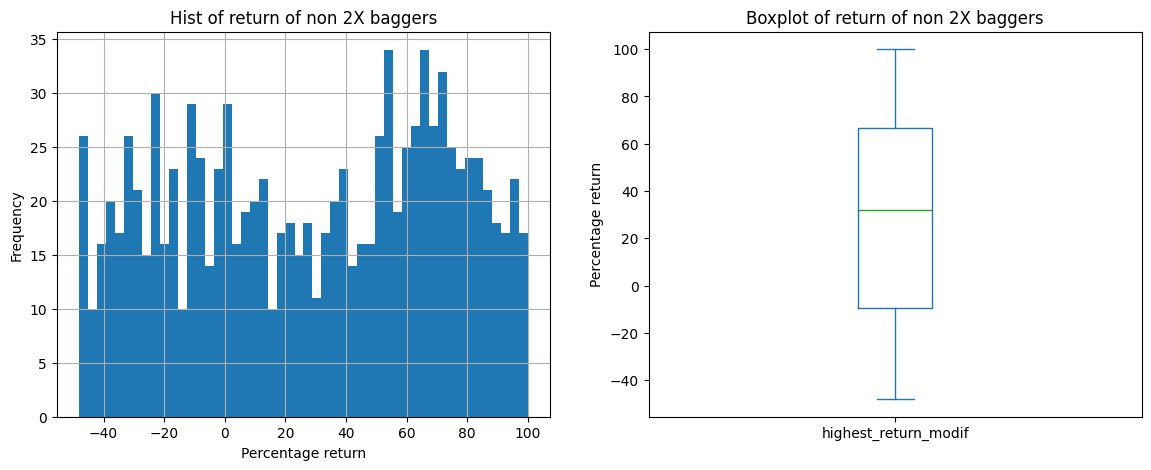

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 100, "highest_return_modif"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] < 100, "highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return of non 2X baggers")
ax[0].set_xlabel("Percentage return")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return of non 2X baggers")
ax[1].set_ylabel("Percentage return");

In [37]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 100, "highest_return_modif"].describe()

count    1410.000000
mean      441.944986
std       350.395043
min       100.170000
25%       170.385000
50%       312.665000
75%       600.000000
max      1584.000000
Name: highest_return_modif, dtype: float64

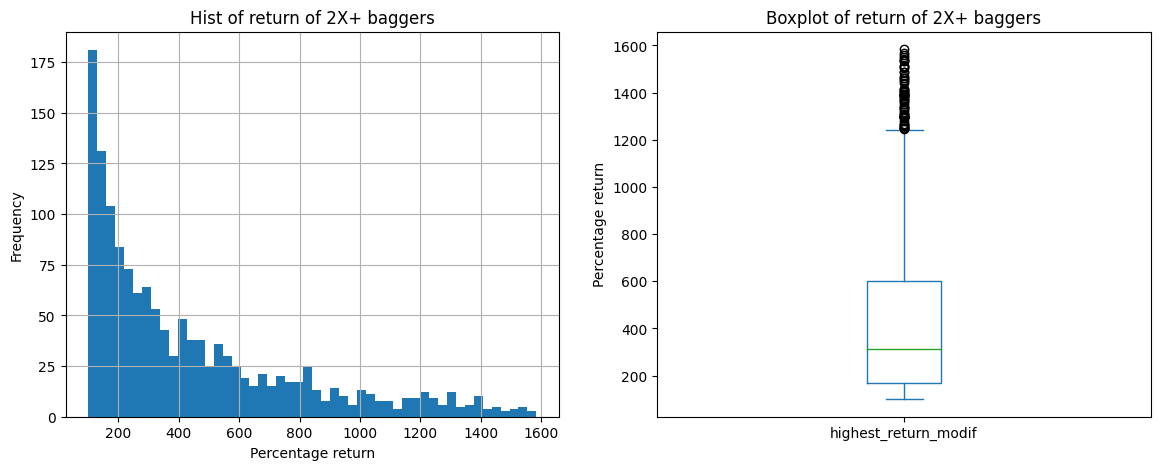

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 100, "highest_return_modif"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] >= 100, "highest_return_modif"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return of 2X+ baggers")
ax[0].set_xlabel("Percentage return")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return of 2X+ baggers")
ax[1].set_ylabel("Percentage return");

- 54% of the companies from the database do not provide more than 100% return. These companies provide an average return of 23.5% with a min of -48% and a max of 100%
- 56% of the companies from the database  provide more than 100% return. These companies provide an average return of 326% with a min of 100% and a max of 948% 

### how long does it take in average to double bag

In [39]:
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].describe()

count    1834.000000
mean        1.098353
std         0.943068
min         0.000000
25%         0.280000
50%         0.770000
75%         1.857500
max         3.000000
Name: doubling_return_delay, dtype: float64

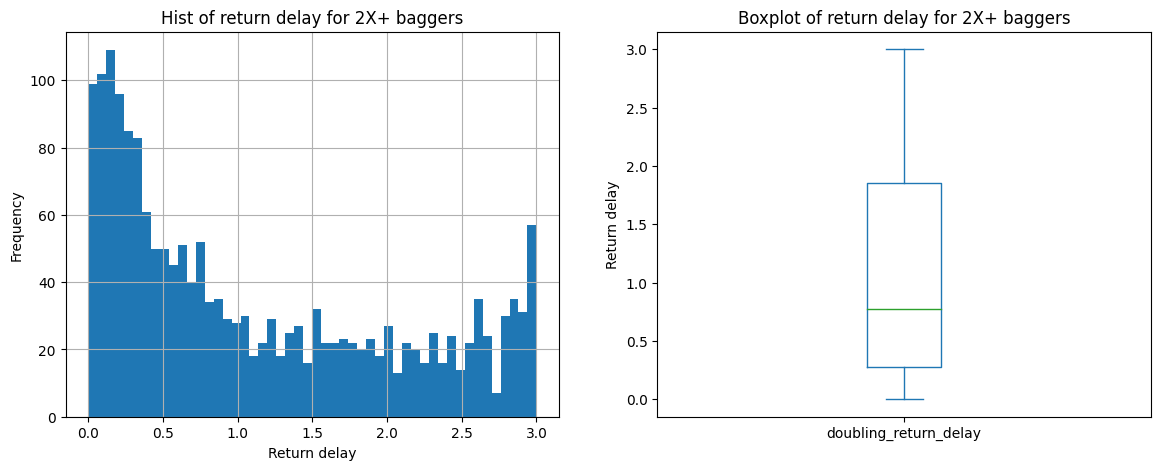

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[~pd.isna(df_wo_outliers["doubling_return_delay"]), "doubling_return_delay"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return delay for 2X+ baggers")
ax[0].set_xlabel("Return delay")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return delay for 2X+ baggers")
ax[1].set_ylabel("Return delay");

* On average the money is doubled in a bit more than a year (1.2 years).
* We can see that the majority of the 2X happends in less than 1.5 years
* The return can wait all the way to 3 years (We limit to three years the investment period on a single company)

### how long does it take to make the highest return modif on the winning ones

In [41]:
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].describe()

count    2117.000000
mean        1.143259
std         0.956178
min         0.000000
25%         0.280000
50%         0.850000
75%         1.960000
max         3.000000
Name: highest_return_delay, dtype: float64

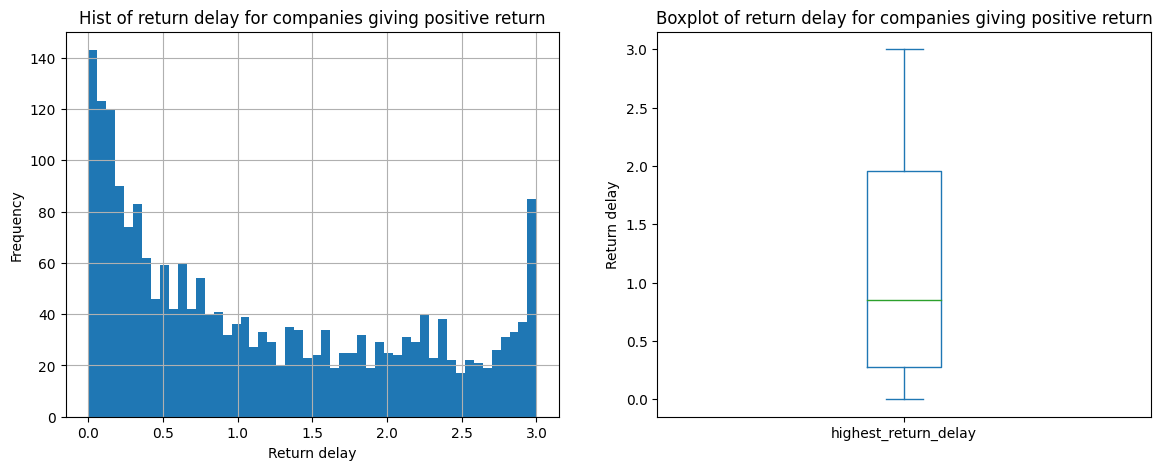

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].hist(bins=50, ax=ax[0])
df_wo_outliers.loc[df_wo_outliers["highest_return_modif"] > 0, "highest_return_delay"].plot.box(ax=ax[1])
ax[0].set_title("Hist of return delay for companies giving positive return")
ax[0].set_xlabel("Return delay")
ax[0].set_ylabel("Frequency")

ax[1].set_title("Boxplot of return delay for companies giving positive return")
ax[1].set_ylabel("Return delay");

* Similar values than for the doubling 
* Values are just slightly higher

### Basic statistical model

In [43]:
df.columns

Index(['ticker', 'ref_report_date', 'report_date', 'ref_report_date_quarter',
       'report_date_quarter', 'outs_shares1', 'outs_shares2', 'outs_shares3',
       'outs_shares4', 'outs_shares5', 'outs_shares6', 'outs_shares7',
       'outs_shares8', 'outs_shares9', 'outs_shares10',
       'outs_shares_slope_pct_10y', 'outs_shares_slope_pct_5y',
       'min_price_date', 'min_price', 'max_price_date', 'max_price', 'ncavps',
       'liqvps', 'ncav_mos', 'liqv_mos', 'highest_return_delay',
       'doubling_price', 'doubling_date', 'doubling_return_delay',
       'highest_return', 'min_price_modif', 'max_price_modif',
       'ncav_mos_modif', 'liqv_mos_modif', 'doubling_price_modif',
       'highest_return_modif', 'ticker_type'],
      dtype='object')

In [44]:
numeric_cols = [col for col in df.columns if df[col].dtype in (int, float) and "outs_shares" not in col]
numeric_cols = numeric_cols + ["outs_shares_slope_pct_10y", "outs_shares_slope_pct_5y"]

In [45]:
numeric_cols

['min_price',
 'max_price',
 'ncavps',
 'liqvps',
 'ncav_mos',
 'liqv_mos',
 'highest_return_delay',
 'doubling_price',
 'doubling_return_delay',
 'highest_return',
 'min_price_modif',
 'max_price_modif',
 'ncav_mos_modif',
 'liqv_mos_modif',
 'doubling_price_modif',
 'highest_return_modif',
 'outs_shares_slope_pct_10y',
 'outs_shares_slope_pct_5y']

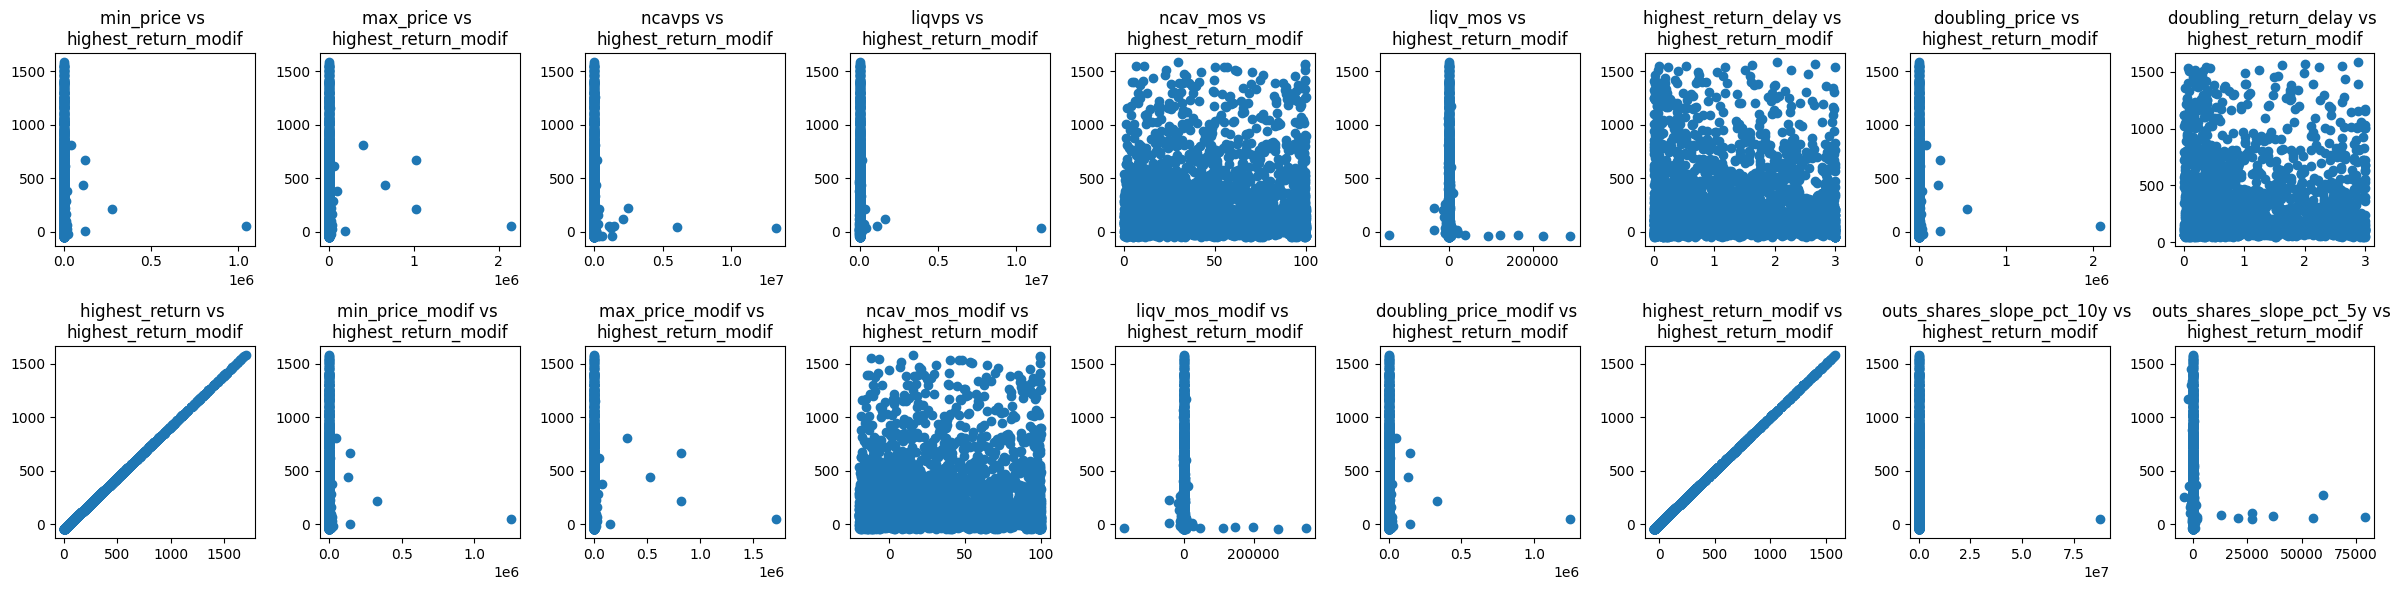

In [46]:
fig, ax = plt.subplots(2, len(numeric_cols) // 2 + len(numeric_cols) % 2, figsize=(24, 6))
for idx, col in enumerate(numeric_cols):
    idx0, idx1 = (
        idx // (len(numeric_cols) // 2),
        idx % (len(numeric_cols) // 2 + len(numeric_cols) % 2)
    )
    ax[idx0, idx1].scatter(df_wo_outliers[col], df_wo_outliers["highest_return_modif"])
    ax[idx0, idx1].set_title(f"{col} vs \nhighest_return_modif")
plt.tight_layout()

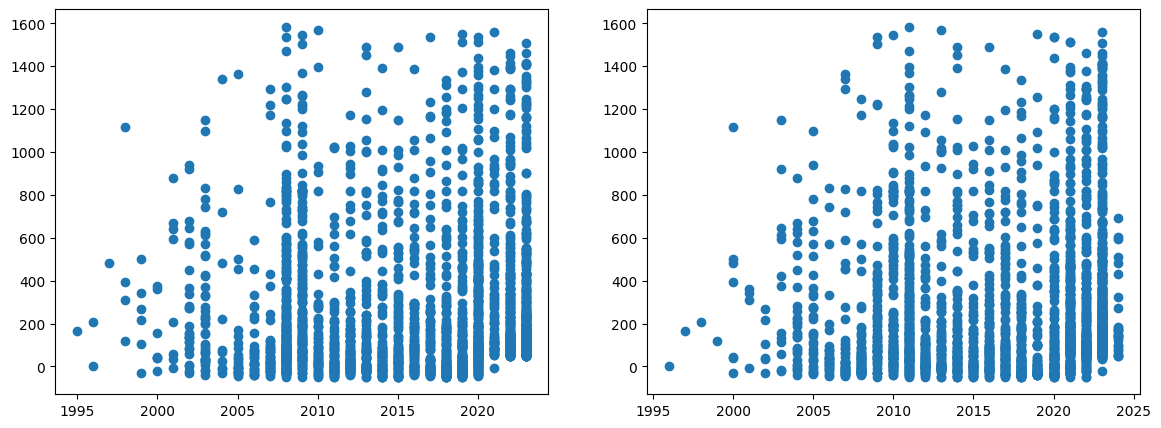

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].scatter(df_wo_outliers["min_price_date"].apply(lambda x: x.year), df_wo_outliers["highest_return_modif"])
ax[1].scatter(df_wo_outliers["max_price_date"].apply(lambda x: x.year), df_wo_outliers["highest_return_modif"])

* This vision per year is quite sparse

### Dummy classif task

In [65]:
df_wo_outliers["label"] = df_wo_outliers["highest_return_modif"] > 80

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [67]:
data = df_wo_outliers.copy()
data = data.dropna()
data = data[data["liqv_mos"] != -np.Inf]
X = data[numeric_cols].copy()
X = X.drop(columns=["highest_return_modif", "highest_return", "max_price", "max_price_modif", "highest_return_delay", "doubling_return_delay", "doubling_price", "doubling_price_modif"], axis=1)
y = data["label"].copy()
del data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [69]:
rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=4, random_state=42)

In [70]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=300, random_state=42)

In [71]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [72]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

       False       1.00      0.30      0.46       159
        True       0.89      1.00      0.94       885

    accuracy                           0.89      1044
   macro avg       0.94      0.65      0.70      1044
weighted avg       0.91      0.89      0.87      1044



In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        28
        True       0.85      0.98      0.91       157

    accuracy                           0.83       185
   macro avg       0.42      0.49      0.45       185
weighted avg       0.72      0.83      0.77       185



In [74]:
feats = dict(zip(rf.feature_names_in_, rf.feature_importances_))

In [75]:
feats = dict(sorted(feats.items(), key=lambda x: x[1], reverse=False))

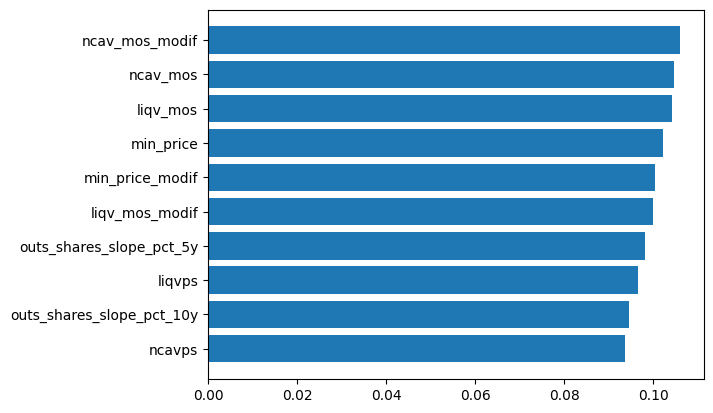

In [76]:
plt.barh(y=list(feats.keys()), width=list(feats.values()));

For now it seems like diversification is the most important thing to consider. More analysis should be carried out

### Average return for a specific case

I consider the companies with a mos of at least 33% and not diluting shares significantly (slope < 20%). What would be the average return in that case

In [77]:
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20), "highest_return_modif"].describe()

count    1222.000000
mean      303.873748
std       358.332247
min       -48.000000
25%        58.700000
50%       154.585000
75%       437.542500
max      1569.230000
Name: highest_return_modif, dtype: float64

In [78]:
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20) & (df_wo_outliers["outs_shares_slope_pct_5y"] < 20), "highest_return_modif"].describe()

count    1158.000000
mean      303.214231
std       359.133144
min       -48.000000
25%        57.917500
50%       154.185000
75%       435.532500
max      1569.230000
Name: highest_return_modif, dtype: float64

In [79]:
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20) & (df_wo_outliers["outs_shares_slope_pct_5y"] < 20) & (df_wo_outliers["highest_return_modif"] < 0), "highest_return_modif"].shape, \
df_wo_outliers.loc[(df_wo_outliers["ncav_mos"] > 33) & (df_wo_outliers["outs_shares_slope_pct_10y"] < 20) & (df_wo_outliers["outs_shares_slope_pct_5y"] < 20) & (df_wo_outliers["highest_return_modif"] > 0), "highest_return_modif"].shape

((133,), (1023,))

If we focus on the companies that have a mos > 33% and not diluting many shares we have:
* an average return of 175% with a min of -48% and a max of 946%
* 373 losing investments and 1497 winning investments

### Number/percentage of delisted companies

In [80]:
percent_delisted = round(100 * df_wo_outliers[df_wo_outliers["ticker_type"] == "delisted"].shape[0] / len(df_wo_outliers), 2)
print(f"The {percent_delisted}% of the final companies considered for backtesting are delisted today")

The 6.13% of the final companies considered for backtesting are delisted today


### Simple total return model

In [81]:
df_wo_outliers["min_price_date"].apply(lambda x: x.year).value_counts()

min_price_date
2023    366
2020    250
2022    233
2008    208
2019    162
2009    157
2018    123
2012     96
2015     93
2013     89
2016     88
2014     87
2017     84
2011     74
2021     70
2010     59
2007     45
2003     41
2006     30
2002     27
2005     25
2004     10
2001      8
2000      7
1999      6
1998      4
1996      2
1995      1
1997      1
Name: count, dtype: int64

I have an initial capital of 10000€ and I want to know how much I have at the end of the period.

For each investment I will put 1k€

In [82]:
buynsell_info = pd.concat([df_wo_outliers[["ticker", "min_price_date"]], df_wo_outliers[["ticker", "max_price_date", "highest_return_modif"]]], axis=0)
buynsell_info = buynsell_info.reset_index(drop=True)
buynsell_info["flag"] = "buy"
buynsell_info.loc[pd.isna(buynsell_info["min_price_date"]), "flag"] = "sell"

In [83]:
buynsell_info["all_dates"] = None
buynsell_info.loc[~pd.isna(buynsell_info["min_price_date"]), "all_dates"] = buynsell_info["min_price_date"]
buynsell_info.loc[~pd.isna(buynsell_info["max_price_date"]), "all_dates"] = buynsell_info["max_price_date"]

In [84]:
buynsell_info = buynsell_info.sort_values(by=["all_dates", "flag"], ascending=True)

In [85]:
solde = 10000
starting_solde = solde
buying_amount = 1000
invest_hash = {}
if buynsell_info.loc[0, "flag"] == "sell":
    print("The row having the oldest date must have a buy flag")
solde_tracking = []
for idx, row in buynsell_info.iterrows():
    solde_tracking.append(solde)
    if row["flag"] == "buy":
        if solde > 0:
            if row["ticker"] not in invest_hash:
                invest_hash[row["ticker"]] = min(buying_amount, solde)
                solde -= min(buying_amount, solde)
        else:
            continue
    if row["flag"] == "sell":
        if row["ticker"] in invest_hash:
            amount = invest_hash.pop(row["ticker"])
            solde += amount * (1 + (row["highest_return_modif"] / 100))
solde_tracking.append(solde)

In [86]:
invest_hash

{}

In [87]:
solde

6496594.186039996

In [88]:
str(buynsell_info.iloc[0]["all_dates"].date()), str(buynsell_info.iloc[len(buynsell_info) - 1]["all_dates"].date())

('1995-01-11', '2024-01-03')

In [89]:
(solde - starting_solde) * 100 / starting_solde

64865.94186039996

In [90]:
cagr = ((solde/starting_solde)**(1/23) - 1) * 100
cagr

32.52282472840242

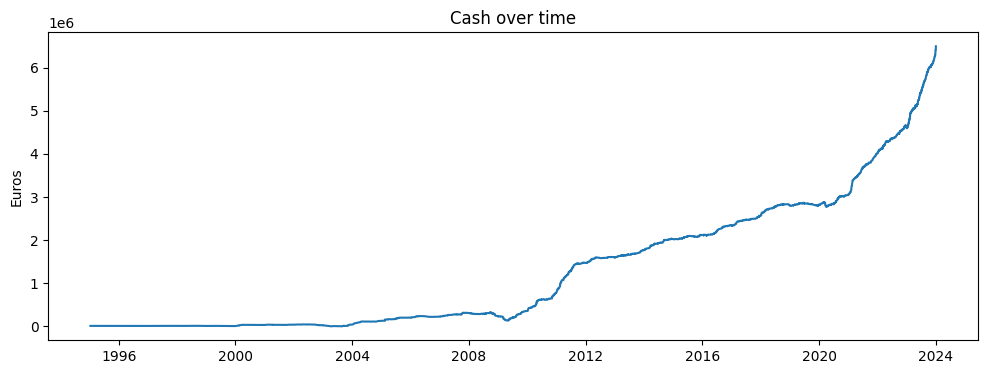

In [91]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(buynsell_info["all_dates"], solde_tracking[1:])
ax.set_title("Cash over time")
ax.set_ylabel("Euros")
None;

In [92]:
buynsell_info["cash"] = solde_tracking[1:]

In [93]:
buynsell_info["all_dates_year"] = buynsell_info["all_dates"].apply(lambda x: x.year)
yearly_first_value = buynsell_info.groupby("all_dates_year")["cash"].first()
yearly_last_value = buynsell_info.groupby("all_dates_year")["cash"].last()

In [94]:
yearly_growth = (yearly_last_value - yearly_first_value) / yearly_first_value

<Axes: xlabel='all_dates_year'>

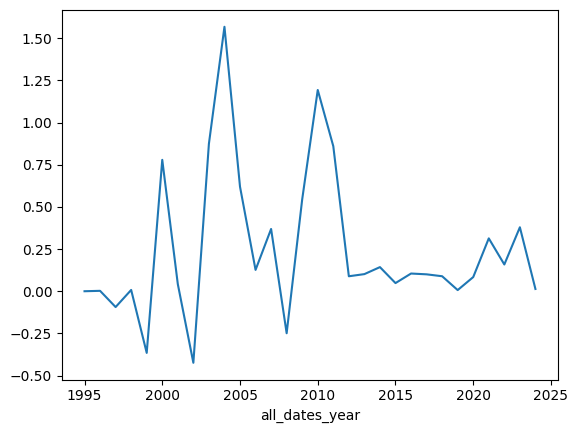

In [95]:
yearly_growth.plot()

### Capping to 100% return

In [96]:
buynsell_info.head()

,ticker,min_price_date,max_price_date,highest_return_modif,flag,all_dates,cash,all_dates_year
318,BCS,1995-01-11,NaT,NaN,buy,1995-01-11 00:00:00,9000.0,1995
2420,CAA,1996-03-08,NaT,NaN,buy,1996-03-08 00:00:00,8000.0,1996
1192,JACO,1996-09-13,NaT,NaN,buy,1996-09-13 00:00:00,7000.0,1996
3638,JACO,NaT,1996-12-05,1.9,sell,1996-12-05 00:00:00,8019.0,1996
2764,BCS,NaT,1997-10-02,164.5,sell,1997-10-02 00:00:00,10664.0,1997


In [97]:
solde = 10000
starting_solde = solde
buying_amount = 1000
invest_hash = {}
if buynsell_info.loc[0, "flag"] == "sell":
    print("The row having the oldest date must have a buy flag")
solde_tracking_double = []
for idx, row in buynsell_info.iterrows():
    #print(solde)
    solde_tracking_double.append(solde)
    if row["flag"] == "buy":
        if solde > 0:
            if row["ticker"] not in invest_hash:
                invest_hash[row["ticker"]] = min(buying_amount, solde)
                solde -= min(buying_amount, solde)
        else:
            continue
    if row["flag"] == "sell":
        if row["ticker"] in invest_hash:
            amount = invest_hash.pop(row["ticker"])
            solde += amount * (1 + min((row["highest_return_modif"] / 100), 1))
solde_tracking_double.append(solde)

In [98]:
invest_hash

{}

In [99]:
solde

1484870.452300001

In [100]:
str(buynsell_info.iloc[0]["all_dates"].date()), str(buynsell_info.iloc[len(buynsell_info) - 1]["all_dates"].date())

('1995-01-11', '2024-01-03')

In [101]:
(solde - starting_solde) * 100 / starting_solde

14748.704523000008

In [102]:
cagr = ((solde/starting_solde)**(1/23) - 1) * 100
cagr

24.28572268855691

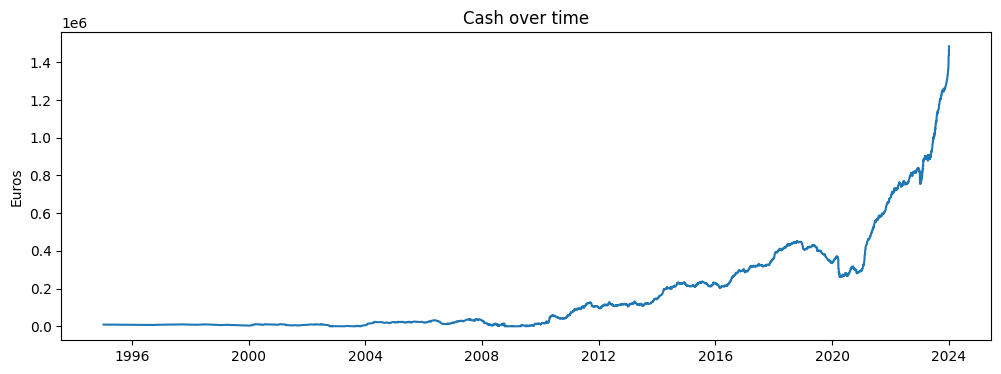

In [103]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(buynsell_info["all_dates"], solde_tracking_double[1:])
ax.set_title("Cash over time")
ax.set_ylabel("Euros")
None;

**Case where we do not cap the max return :**
- With 10k€ on July 8th 1996 we would have 6.4M€ on January 4th 2024. For a CAGR of 32.5%

**Case where we cap the max return :**
- With 10k€ on July 8th 1996 we would have 1.4M€ on January 4th 2024. For a CAGR of 24.2%

### Next steps / possible improvements

- Add delisted companies (so run the backtesting pipeline with the delisted tickers) and re-run the whole thing DONE
- Carry out the same exercise of the simple total return model but always capping the max return at 100% DONE
- Run ncav screener to spot companies for today
- Change the mos thr
- The number of companies is quite big. It would interesting to cleverly select a more "realistic" number of companies. For example, choosing the companies that I am going to find on brokers
- We assume that we always invest 1k. But after a good return has been achieved (say, 50k) we will be able to put more initial investment over time, making the total return potentially even higher
- Find what other features might help with a better statistical prediction of good vs bad performing companies. Play also with the threshold
- A more complex, yet realistic model can be achieved if we take into consideration whether the company has improved the financials during the period we are invested in. That would help make more educated decisions on whether to stay invested or find a more promising opportunity (Not the highest priority)